# Usage
This notebook is used to create the dataframe containing tuples of:

- job description
- resume
- feedback report
- matching score

In [1]:
import os
import re
import pandas as pd
import numpy as np

In [2]:
results_dir = "/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/palm_output_aggregate"
resume_dir = "/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_norm"
jd_path = "/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/job_descr/jd_unity_norm"

In [112]:
# df = pd.DataFrame(columns=["path", "score", "report"])
# df['score'] = df['score'].astype(float)

# for filename in os.listdir(results_dir):
#         if filename.endswith(".txt"):
#                 # resume_substring, jd_substring = filename.split("_")
#                 # resume_substring = os.path.join(resume_dir, f"{resume_substring}.txt")
#                 # jd_substring = os.path.join(jd_path, f"{jd_substring}.txt")
#                 filename = os.path.join(results_dir, filename)
#                 try:
#                         with open(filename, "r") as f:
#                                 results = f.read()
#                 except:
#                         print(f"Could not open {filename}")
#                         break
#                 score, report = extract_score_report(results)
#                 # put the results in the dataframe
#                 #make score a number from string
#                 dict = {"path": filename,
#                         "score": float(score), 
#                         "report": report
#                         }
#                 df.loc[len(df)] = dict

# Statistics of SCORE and REPORT

In [125]:
# read the combined df
df = pd.read_pickle("res_job_score_report_combined.pkl")
# df = pd.read_pickle("combined_data.csv")
df.head()

,resume,job,score,report
0,derek leckner new york ny email me on indeed c...,what s the role etsy is seeking a staff machin...,0.85,The candidate has a strong background in data ...
1,arthur harper lead software engineer kokomo in...,what you ll do deep dive on specific technical...,0.85,The candidate has a strong background in softw...
2,NaN,NaN,0.70,The resume is a good match for the job. The ca...
3,danny kabakibo san francisco ca email me on in...,what s the role etsy is seeking a staff machin...,0.80,The candidate has a strong background in machi...
4,NaN,NaN,0.85,The candidate has a strong background in softw...


Mean value of score is: 0.7508218654434249
Max value of score is: 0.9
Min value of score is: 0.2
standard deviation of score is: 0.08439259581929048


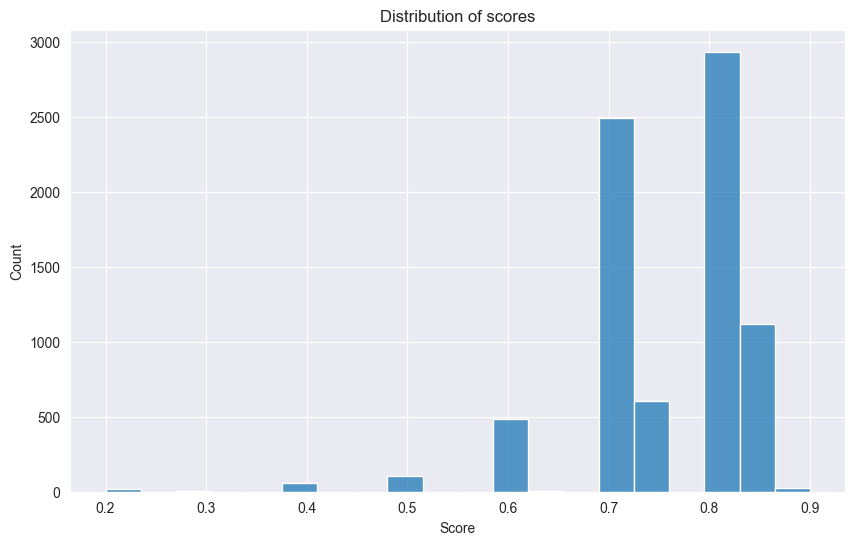

In [126]:
# get the mean value of the df['score']
df['score'].mean()
print(f"Mean value of score is: {df['score'].mean()}")
# get the max value of the df['score']
df['score'].max()
print(f"Max value of score is: {df['score'].max()}")
print(f"Min value of score is: {df['score'].min()}")
print(f"standard deviation of score is: {df['score'].std()}")

# plot the distribution of the scores
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20)
plt.title("Distribution of scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.savefig("score_distribution.png")
plt.show()


In [127]:
df['score'].describe()

count    7848.000000
mean        0.750822
std         0.084393
min         0.200000
25%         0.700000
50%         0.800000
75%         0.800000
max         0.900000
Name: score, dtype: float64

In [129]:
# print min, max, mean, std of length of df['report']
print(f"Min value of length of report is: {df['report'].str.len().min()}")
print(f"Max value of length of report is: {df['report'].str.len().max()}")
print(f"Mean value of length of report is: {df['report'].str.len().mean()}")

Min value of length of report is: 97
Max value of length of report is: 5773
Mean value of length of report is: 796.0756880733945


# Create dataframe with resume, job description and report

Creates:

1. `res_job_score_report_v1.csv`
1. `res_job_score_report_v2.csv`
1. `res_job_score_report_v3.csv`
1. `res_job_score_report_v4.csv`

Each contains 4 columns: [resume, job, score, report]

In [95]:
base_dir = "/Users/andreasloutzidis/Downloads/indeed_data/final_dataset"
results_dir = os.path.join(base_dir, "palm_output_v2")
# results_dir = os.path.join(base_dir, "palm_output_v3")
# results_dir = os.path.join(base_dir, "palm_output_v4")

resume_dir = os.path.join(base_dir, "resume/resume_unity_norm")
jd_path = os.path.join(base_dir, "job_descr/jd_unity_norm")

In [111]:
def extract_score_report(text: str):
    pattern = r"SCORE: (\d+\.\d+).*?REPORT: (.*)"
    match = re.search(pattern, text, re.DOTALL)

    if match:
        # Extract SCORE and REPORT from the match object
        score = match.group(1)
        report = match.group(2).strip()
        return score, report

In [96]:
complete_df = pd.DataFrame(columns=["resume", "job", "score", "report"])
complete_df['score'] = complete_df['score'].astype(float)
counter = 0
for filename in os.listdir(results_dir):
    if filename.endswith(".txt"):
        filename = os.path.join(results_dir, filename)
        with open(filename, "r") as f:
                results = f.read()
        try:
                score, report = extract_score_report(results)
        except:
                print(f"Could not extract score and report from {filename}")
                continue
        # print(filename)
        print(f"Processing {counter} out of {len(os.listdir(results_dir))}")
        # now read resume and job
        try:  
                resume_substring, jd_substring = filename.rsplit("_", 1)
                resume_substring = os.path.basename(resume_substring)
                resume_substring = os.path.join(resume_dir, f"{resume_substring}.txt")
                jd_substring = os.path.basename(jd_substring)
                jd_substring = os.path.join(jd_path, f"{jd_substring}")

                print(resume_substring, jd_substring)
                with open(resume_substring, "r") as f:
                        resume = f.read()
                with open(jd_substring, "r") as f:
                        job = f.read()
        except:
              print(f"filename: {filename}")
              print(f"job not found for {jd_substring}")
              job = ""
              print(f"resume not found for {resume_substring}")
              resume = ""
              continue
        
        dict = {"resume": resume,
                "job": job,   
                "score": float(score), 
                "report": report
                }
        complete_df.loc[len(complete_df)] = dict
        counter += 1

Processing 0 out of 809
/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_norm/Rebecca-Treptow.txt /Users/andreasloutzidis/Downloads/indeed_data/final_dataset/job_descr/jd_unity_norm/digiflight.txt
Processing 1 out of 809
/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_norm/SHARDAE+(1).txt /Users/andreasloutzidis/Downloads/indeed_data/final_dataset/job_descr/jd_unity_norm/peraton.txt
Processing 2 out of 809
/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_norm/Mustafin_Dias_Resume.txt /Users/andreasloutzidis/Downloads/indeed_data/final_dataset/job_descr/jd_unity_norm/lyft.txt
Processing 3 out of 809
/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_norm/Helen-Hu.txt /Users/andreasloutzidis/Downloads/indeed_data/final_dataset/job_descr/jd_unity_norm/doordash.txt
Processing 4 out of 809
/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/resume/resume_unity_n

In [97]:
# complete_df.iloc[2]['resume'] == ""
# # count how many resumes are empty, note that the resume are string
# count = 0
# for i in range(len(complete_df)):
#         if complete_df.iloc[i]['resume'] == "":
#                 count += 1
# print(f"Number of resumes that are empty: {count}")

In [98]:
complete_df.shape

(605, 4)

In [93]:
complete_df.head()

,resume,job,score,report
0,jason bloomstein mountain view ca email me on ...,you will report into a science manager respons...,0.80,The candidate has a strong background in softw...
1,babah mansaray lanham md email me on indeed lo...,who you ll work with as an engineer you will w...,0.70,The candidate has a background in data science...
2,charles aban data scientist at ultra clean hol...,what you ll do develop machine learning models...,0.75,The candidate has a strong educational backgro...
3,soham kasar milpitas ca education san jose sta...,the impact you ll make you will be part of a s...,0.80,The candidate has a strong educational backgro...
4,manvitha golla chittibabunaidu long beach ca e...,company description apexon is a digital first ...,0.80,The candidate has a strong background in softw...


In [94]:
complete_df.to_csv("res_job_score_report_v3.csv", index=False)

# Combine Dataframes

In [114]:
# combine the csv files into one
df_1 = pd.read_csv("res_job_score_report_v1.csv")
df_2 = pd.read_csv("res_job_score_report_v2.csv")
df_3 = pd.read_csv("res_job_score_report_v3.csv")
df_4 = pd.read_csv("res_job_score_report_v4.csv")

# combine the dataframes
df = pd.concat([df_1, df_2, df_3, df_4])
df.shape

(7848, 4)

In [115]:
# save the df to pkl
df.to_pickle("res_job_score_report_combined.pkl")

In [117]:
test_df = pd.read_pickle("res_job_score_report_combined.pkl")

In [118]:
test_df

,resume,job,score,report
0,derek leckner new york ny email me on indeed c...,what s the role etsy is seeking a staff machin...,0.85,The candidate has a strong background in data ...
1,arthur harper lead software engineer kokomo in...,what you ll do deep dive on specific technical...,0.85,The candidate has a strong background in softw...
2,NaN,NaN,0.70,The resume is a good match for the job. The ca...
3,danny kabakibo san francisco ca email me on in...,what s the role etsy is seeking a staff machin...,0.80,The candidate has a strong background in machi...
4,NaN,NaN,0.85,The candidate has a strong background in softw...
...,...,...,...,...
2065,brandon tran pizzamnchr com active secret clea...,about you whether you are a new college gradua...,0.80,The candidate has a strong technical backgroun...
2066,zacharias alaniz georgetown tx email me on ind...,what you ll do drive design development implem...,0.80,The candidate has a strong background in softw...
2067,matthew killeen c linkedin www linkedin com in...,job description core responsibilities collabor...,0.80,The resume of Matthew Killeen is a good match ...
2068,ahana sheshadri email me on indeed influential...,position description designs builds and deploy...,0.80,The resume of Ahana Sheshadri demonstrates a s...


# [Deprecated] Create dataframe with resume and jobs paths

In [58]:
# with open("resume_job_list.txt", "r") as f:
#     resume_job_list = f.read().splitlines()

# import pandas as pd

# res_job_combinations_df = pd.DataFrame(columns=["resume", "job"])

# resume, job = "", ""
# for line in resume_job_list:
#     resume, job = line.split(", ")
#     resume = resume[8:].replace(" ", "")
#     job = job[5:].replace(" ", "")
    
#     dict = {"resume": os.path.basename(resume),
#             "job": os.path.basename(job)
#             }
#     res_job_combinations_df.loc[len(res_job_combinations_df)] = dict

  
# res_job_combinations_df.shape

In [59]:
# res_job_combinations_df.to_csv("res_job_combs_v1.csv", index=False)

In [60]:
# res_job_combinations_df.head()

# Create res <> jd mapping using the mapping created at generation time

Takes a txt file that contains the filename of a pair of resume and job description and creates a csv file with the basename of the file

In [51]:
import csv

mapping_path = "/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/palm_output_res_jd_mapping"
# Read the lines from the input text file
with open(os.path.join(mapping_path, "res_job_combs_v4.txt"), 'r') as file:
    lines = file.readlines()

In [52]:
# Process the lines to extract data and create a list of tuples
data = []
for line in lines:
    resume, job_description = eval(line)  # Convert string representation of list to actual list
    data.append((os.path.basename(resume), os.path.basename(job_description)))

In [53]:
data[0]

('Cristopher-Masserini (1).txt', 'amazon.txt')

In [54]:
len(data)

3090

In [55]:
# Write the data to a CSV file
with open('res_job_combs_v4.csv', 'w', newline='') as csvfile:
    fieldnames = ['resume', 'job_description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for resume, job_description in data:
        writer.writerow({'resume': resume, 'job_description': job_description})

# Manually create res <> jd mapping from the results directory

After the two above groups we end up with resume and job description mappings (csv):

- `res_job_combs_v1`
- `res_job_combs_v2`
- `res_job_combs_v3`
- `res_job_combs_v4`

In [57]:
input_directory = '/Users/andreasloutzidis/Downloads/indeed_data/final_dataset/palm_output_v2'  # Replace this with the path to your directory containing the .txt files
output_csv = 'res_job_combs_v2.csv'

# Function to split the filename at the rightmost "_" character
def split_filename(filename):
    parts = filename.rsplit('_', 1)
    if len(parts) == 2:
        return parts
    else:
        return [filename, '']

# Process files in the directory
data = []
for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        resume, job_description = split_filename(filename)
        data.append((os.path.basename(resume), os.path.basename(job_description)))

print(f"length of data: {len(data)}")
# Write the data to a CSV file
with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['resume', 'job_description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for resume, job_description in data:
        writer.writerow({'resume': resume, 'job_description': job_description})


length of data: 809
